In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error, r2_score # oluşturduğumuz regresyon modelinin performansıbı ölçerler.

**r2_score:** Determinasyon katsayısını hesaplar. (Hangi oranda başarılı sorusunun cevabını aramak için r2_score a bakacağız.)

**MAE (Ortalama Mutlak Hata (Mean Absolute Error)):** Ortalama mutlak hata iki sürekli değişken arasındaki farkın ölçüsüdür. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir. MAE aynı zamanda her veri noktası ile en iyi uyan çizgi arasındaki ortalama yatay mesafedir. MAE değeri kolay yorumlanabilir olduğu için regresyon ve zaman serisi problemlerinde sıkça kullanılmaktadır. MAE değeri 0’dan ∞’a kadar değişebilir. Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir.

> Problem : Satış rakamları reklam harcamalarından etkileniyor mu?

In [3]:
satislar = np.array([22,21,23,26,30,31,32]) # Bağımlı (Y)
reklam_giderleri = np.array([7,11,15,22,26,28,31]) # Bağımsız (X)

In [4]:
df = pd.DataFrame({"satislar":satislar,
                   "reklam_giderleri":reklam_giderleri})
df.head()

,satislar,reklam_giderleri
0,22,7
1,21,11
2,23,15
3,26,22
4,30,26


In [11]:
yillar = [str(x+2000) for x in range(len(df))]
yillar

['2000', '2001', '2002', '2003', '2004', '2005', '2006']

In [8]:
df.index = yillar

In [9]:
df.head()

,satislar,reklam_giderleri
2000,22,7
2001,21,11
2002,23,15
2003,26,22
2004,30,26


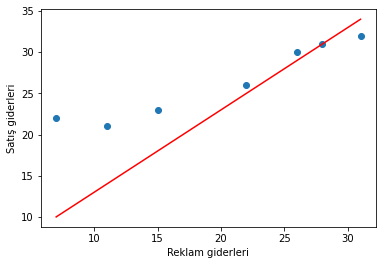

In [16]:
plt.scatter(x = reklam_giderleri, y=satislar)
plt.xlabel("Reklam giderleri")
plt.ylabel("Satış giderleri")

# kendimiz bir çizi çizip gözlemleyelim
plt.plot(reklam_giderleri, reklam_giderleri*1+3, color="red");
# bu yapıyı lineer regresyon ile yapacağız.

### Lineer Regresyon
**fit_intercept=True :** 𝛽0 olacak mı olmayacak mı? (True -> 𝛽0 var demek) (𝑦^ = 𝛽0 + 𝛽1 * X )

**normalize = True :** Veri ön işleme aşamasında verileri normalize etmediysek bu parametre ile burada normalize edebiliz.

**BİLGİ :**Önemli Fonksiyonlar
1. fit() - uydurma, öğrenme
2. transform()
3. fit_transfor() 

Bu 3 fonsiyondan faydalanarak öğrenme gerçekleştirmeye çalışacağız. Ayrıca 𝛽0 ve 𝛽1 lerin tahmin edilmesinde de kullanılır.

In [18]:
lineer_model = LinearRegression()

#### Aşağıdaki koddan şöyle bir hata aldık.
ValueError: Expected 2D array, got 1D array instead:
array=[ 7 11 15 22 26 28 31].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Bunu düzeltmek için reklam giderlerini 2 boyutlu bir diziye döndürelim.

In [20]:
reklam_giderleri = reklam_giderleri.reshape(-1,1) # satır sayısı önemli değil ama sütun sayısı 1 olsun diyoruz. 
reklam_giderleri 

array([[ 7],
       [11],
       [15],
       [22],
       [26],
       [28],
       [31]])

In [21]:
lineer_model.fit(X=reklam_giderleri, y=satislar)

LinearRegression()

In [22]:
lineer_model.coef_ # Katsayılar yani 𝛽1,𝛽2,𝛽3... ancak 𝛽0 değil
# Sonuç bir dizi yapısında bunun nedeni birden fazla katsayı olabilir.

array([0.484])

* 𝛽0 kesme terimi(intercept) diye geçer. Yani y eksenin, kestiği nokta

In [23]:
lineer_model.intercept_ # 𝛽0 değeri

16.74857142857143

> **𝑦^ = 𝛽0 + 𝛽1 * X** = 16.748 + 0.484 * X



In [27]:
print("𝛽0= {},   𝛽1= {}".format(lineer_model.intercept_,
                              lineer_model.coef_[0]))

𝛽0= 16.74857142857143,   𝛽1= 0.48399999999999993


* Modelimiz bu şekilde oluştu. Model için bir tane Determinasyon katsayısına yani R^2 ye ihtiyacımız var.

In [28]:
lineer_model.score(X=reklam_giderleri, y=satislar)  # Detarminasyon Katsayısı

0.9317000000000001

Bizim modelimiz %93 oranında verileri ortaya çıkartıyor yorumunu yapabilirz. Gayet iyi bir öğrenme gerçekleşmiş. Tahmin aşamasına geçebilirz.

-> Eğer bu öğrenme performansından memnun olmasaydık bu medel ile ilgili iyileştimeler yapmamız gerekiyor. Belki normalizasyon, belki ön işlemede iyileştirme ya da veriler doğru mu yanlış mı onu kontrol etmemiz gerekiyor.

In [33]:
satislar_pred = lineer_model.predict(reklam_giderleri)
satislar_pred
# X leri verdiğimizde y leri tahmin eder

array([20.13657143, 22.07257143, 24.00857143, 27.39657143, 29.33257143,
       30.30057143, 31.75257143])

In [32]:
satislar # gerçek değerler

array([22, 21, 23, 26, 30, 31, 32])

In [34]:
hatalar = satislar - satislar_pred
hatalar

array([ 1.86342857, -1.07257143, -1.00857143, -1.39657143,  0.66742857,
        0.69942857,  0.24742857])

In [35]:
# hataların toplamı 0 olur. Çünkü regresyon çizgisi en uygun yerden geçiyor.
hatalar.sum()

0.0

In [36]:
# Detatarminasyon katsayısını bulalım. (hatalar^2) ihtiyacımız var.
hatalarin_karesi = np.square(hatalar) # hatalar**2
hatalarin_karesi
# negatif değer kalmadı artık toplamlaır 0 olmayacak dolayısı ile bu durum hatalar için değerlendirme sansı tanıyor.

array([3.47236604, 1.15040947, 1.01721633, 1.95041176, 0.4454609 ,
       0.48920033, 0.0612209 ])

### Determinasyon Katsayısı 
> **R^2 = (1 - u/v)**

* **u ->** ((y_true - y_pred) ** 2).sum()

* **v ->** ((y_true - y_true.mean()) ** 2).sum().sum()

lineer_model.score(X,y) ile hesaplanır. (yukarda uyguladık.)

In [39]:
# Manuel olarak yapalım.
r2 = 1- ((hatalarin_karesi).sum() / ((satislar - satislar.mean())**2).sum())
r2

0.9317000000000001

**Gerçek ve tahmin değerlerinin görselleştirelim.**

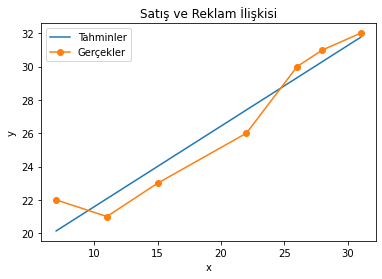

In [48]:
plt.plot(reklam_giderleri, satislar_pred, label="Tahminler")
plt.plot(reklam_giderleri, satislar, label="Gerçekler", marker="o")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Satış ve Reklam İlişkisi");

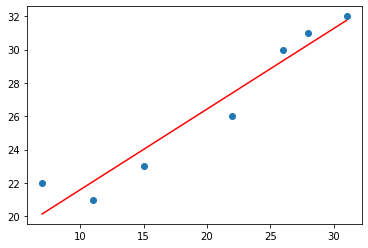

In [54]:
plt.scatter(x = reklam_giderleri, y= satislar)
plt.plot(reklam_giderleri, satislar_pred, color="red");

In [58]:
lineer_model.intercept_ + reklam_giderleri*lineer_model.coef_[0]

array([[20.13657143],
       [22.07257143],
       [24.00857143],
       [27.39657143],
       [29.33257143],
       [30.30057143],
       [31.75257143]])

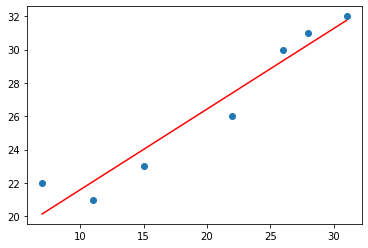

In [59]:
plt.scatter(x = reklam_giderleri, y= satislar)
plt.plot(reklam_giderleri, lineer_model.intercept_ + reklam_giderleri*lineer_model.coef_[0], color="red");

## Çoklu Regresyon

In [63]:
from sklearn.datasets import load_boston

In [71]:
boston = load_boston()

In [72]:
boston_X, boston_y = load_boston(return_X_y=True)

In [73]:
boston_X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [74]:
boston_y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [75]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [76]:
boston_X.shape, boston_y.shape

((506, 13), (506,))

In [80]:
boston_X = pd.DataFrame(boston_X, columns=boston.feature_names)
boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
pd.DataFrame(boston_y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [82]:
boston_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [83]:
boston_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Çoklu regresyon anlizinde en önemli kısım hangi değişkenlerin modele katılacağı sorusudur. Biz burada şiöyle bir yol izleyeceğiz;
* Korelasyon katsayılarına bakacağız
* Eğer 2 değişken arasında yüksek korelasyon varsa bunlardan birisini modelden çıkarmamız gerekiyor. 

**Neden?**

Çünkü korelasyonu yüksek olan veriler aslında birbirine çok benzeyen veriler demektir. Değişkenler birbirine benzeyen değişkenler ve bu ikisini almak regresyon sonucumuza zarar verecektir.

In [84]:
boston_X.corr() # korelasyon hesabı

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Korelasyonu görebiliriz. Örneğin 0.75 i baz alırsak; +0.75 den büyük olanlar veya -0.75 den küçük olanlar arasında yüksek korelasyon var diyeceğiz. Bu yüksek korelasyona sahip verileri veri setinden çıkartmamız gerekecek. 

In [88]:
# En yüksek mutlak 5 korelasyonu sıralayalım

for col in boston.feature_names:
    en_yuksek_degerler = abs(boston_X.corr()[col].nlargest(n=5))
    # En yüksek korelasyona sahip 5 değeri alalım.
    print(en_yuksek_degerler)
    
    # eğer 0.75'ten büyük değer varsa yazdır.
    for index, value in en_yuksek_degerler.items():
        if 1 > value > 0.75:
            print("\n\n",index, col, "değişkenleri yüksek korelasyona sahip: ", value,"\n\n")

CRIM     1.000000
RAD      0.625505
TAX      0.582764
LSTAT    0.455621
NOX      0.420972
Name: CRIM, dtype: float64
ZN      1.000000
DIS     0.664408
RM      0.311991
B       0.175520
CHAS    0.042697
Name: ZN, dtype: float64
INDUS    1.000000
NOX      0.763651
TAX      0.720760
AGE      0.644779
LSTAT    0.603800
Name: INDUS, dtype: float64


 NOX INDUS değişkenleri yüksek korelasyona sahip:  0.7636514469209139 


CHAS     1.000000
RM       0.091251
NOX      0.091203
AGE      0.086518
INDUS    0.062938
Name: CHAS, dtype: float64
NOX      1.000000
INDUS    0.763651
AGE      0.731470
TAX      0.668023
RAD      0.611441
Name: NOX, dtype: float64


 INDUS NOX değişkenleri yüksek korelasyona sahip:  0.7636514469209139 


RM      1.000000
ZN      0.311991
DIS     0.205246
B       0.128069
CHAS    0.091251
Name: RM, dtype: float64
AGE      1.000000
NOX      0.731470
INDUS    0.644779
LSTAT    0.602339
TAX      0.506456
Name: AGE, dtype: float64
DIS     1.000000
ZN      0.664408
B       0.29

* NOX INDUS
* TAX RAD

Değerleri arasında bir korelasyon söz konusudur.

In [90]:
boston_X.drop(["NOX","RAD"],axis=1, inplace=True)

In [91]:
boston_X.head() # NOX ve RAD değişkenlerimiz artık yok.
# Yüksek korelasyonlu değişkenlerden kurtulduk.

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [92]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(boston_X,
                                                    boston_y,
                                                    test_size=0.33,
                                                    random_state=42)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 11), (167, 11), (339,), (167,))

In [96]:
# Model kurma
cr = LinearRegression()

In [97]:
cr.fit(X_train, y_train)

LinearRegression()

In [102]:
cr.coef_.round(2)

array([-0.08,  0.03, -0.05,  3.45,  4.16, -0.03, -1.18, -0.  , -0.69,
        0.01, -0.57])

In [100]:
cr.intercept_.round(2) # beta0

19.11

In [103]:
boston_y_pred = cr.predict(X_test)

In [104]:
boston_y_pred # tahmin

array([27.84890807, 36.17704878, 17.40316633, 25.2968811 , 18.76062642,
       22.00295224, 17.27926162, 14.89656835, 20.35573203, 21.38010186,
       23.39484419, 17.87154312, -6.13940655, 21.21726215, 18.90162665,
       25.22539637, 18.22824244,  5.02209078, 39.6267099 , 17.50782638,
       27.55897338, 29.44559371, 11.29644701, 25.41225522, 18.00541822,
       13.83645963, 22.78367984, 14.75645747, 21.29318202, 20.33571279,
       21.06233692, 25.40772108, 25.14608523, 19.14911072, 14.38220628,
       20.55711396, 30.86138884, 20.72483283, 23.61106688, 24.77584746,
       14.68999193, 30.26928138, 41.10937866, 17.63643964, 27.17447136,
       16.74012194, 14.1477595 , 26.03219015, 18.4170993 , 31.24726074,
       20.71398511, 32.84525704, 16.08102298, 27.02070789, 39.27967516,
       22.03408108, 19.08741782, 32.45386309, 24.66378053, 12.02193162,
       22.52544363, 30.57777848, 31.51312786, 17.83080875, 22.91726257,
       15.20837999, 19.89950277, 26.09103456, 31.16676135, 11.98

In [105]:
y_test # gerçekler

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [106]:
r2_score(y_test, boston_y_pred) # %69 unu doğru tahmin edilmiş.

0.6919945689994251

<IPython.core.display.Javascript object>


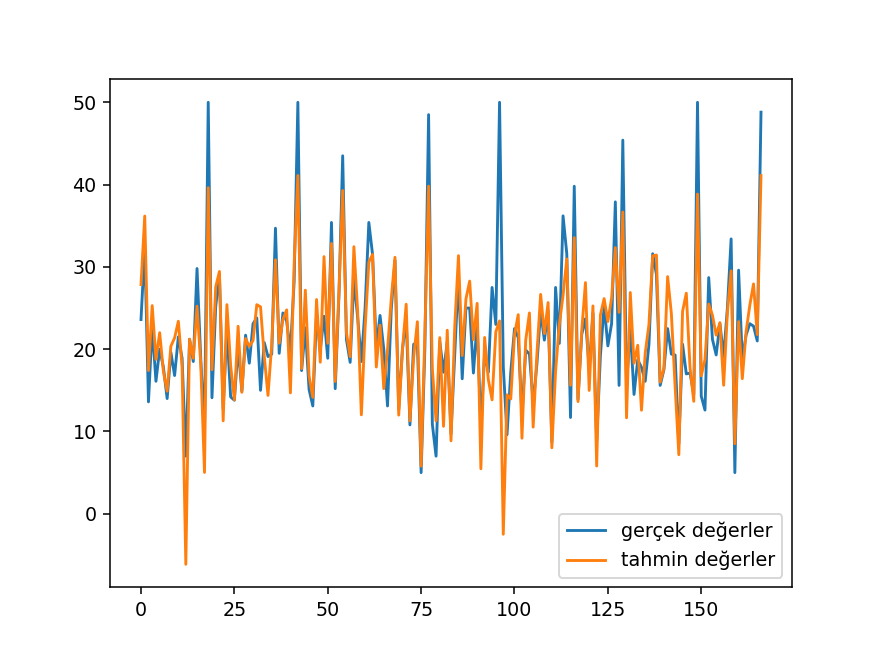

In [111]:
# Grafik çizdirelim.
%matplotlib notebook 
# grafiği detaylıca incelememizi sağlıyor

plt.plot(y_test, label="gerçek değerler")
plt.plot(boston_y_pred, label="tahmin değerler")
plt.legend();